# Time-series stationarity - Eliminating Trends

## Objectives

* Check the stationarity in a time-series in terms on trend and seasonality. 
* Use log transformations as a first step to minimize non-stationarity.
* Use smoothing techniques (rolling estimates) with Moving Average (MA) and Weighted Moving Average (WMA).
* Compare the results of MA and WMA using statistical tests. 

## Introduction

Although stationarity assumption is required in major time-series modelling techniques, almost none of practical time-series are stationary. In this lab we shall discuss how to make a time-series stationary. In reality, it is almost impossible to make a series perfectly stationary, but we try to take it as close as possible.

Lets understand what is making a TS non-stationary. There are 2 major reasons behind non-stationaruty of a TS:

>**Trend: Varying mean over time**. 

>**Seasonality: Variations at specific time-frames.**



![](http://radacad.com/wp-content/uploads/2017/07/trendseasonal.png)



In the last lab, we saw that on average, the number of passengers was growing over time i.e. increase in trend. We also saw some seasonlity, reflecting specific times of year when people travel more. 

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series in order to get a stationary series. Statistical modelling techniques can then be implemented on this series. The final step would be to convert the modelled values into the original scale by applying trend and seasonality constraints back.

## Estimating & Eliminating Trend

Let's load necessary libraries and the air passengers dataset from last lab and convert that into a time-series object. 

In [4]:
#Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from pandas import Series
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller

# Import passengers.csv and set it as a time-series object. Plot the TS
df = pd.read_csv('passengers.csv')
ts = df.set_index('Month')
ts.index = pd.to_datetime(ts.index)
ts.head()

#Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121

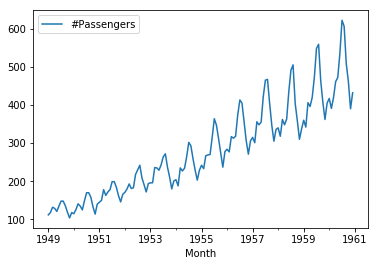

In [5]:
ts.plot()

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

In [10]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab

def stationarity_check(TS,window,column_for_dickey):
    #graph moving average and std
    rolmean = TS.rolling(window=window).mean()
    rolstd = TS.rolling(window=window).std()
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    #Dicky Fuller Test
    df_output = adfuller(TS[column_for_dickey], autolag='AIC')
    dftest = adfuller(TS[column_for_dickey], autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    return dfoutput
    
    

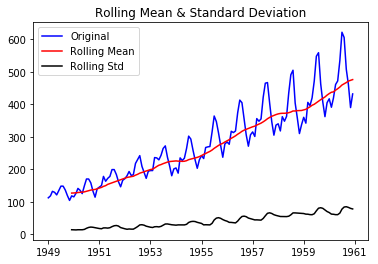

Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

In [11]:
stationarity_check(ts,12,'#Passengers')

### Log Transformation

One of the first tricks to enforce stationarity can be simple log transformation to make the time-series more "uniform" over time. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. 

Lets take a log transform here for simplicity. use numPy's `np.log()` to get the log transform of the TS and compare the output with original TS. 

In [12]:
# Log transform timeseries and compare with original to check the effect
ts_log = np.log(ts)

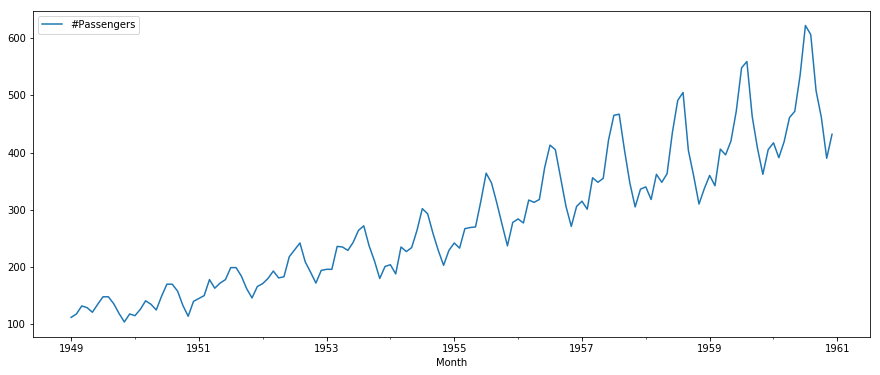

In [15]:
rcParams['figure.figsize'] = 15, 6
ts_log.plot()
ts.plot()

We can see above the peaks in the time-series, representing seasonality are looking more uniform. In this simple case, it is easy to see a forward trend in the data. But its not very intuitive in presence of noise. So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:

* Aggregation – taking average for a time period like monthly/weekly averages
* Smoothing – taking rolling averages
* Polynomial Fitting – fit a regression model

We shall discuss the smoothing approach here which refers to rolling estimates as seen in the previous lab. It involves considering past events in context of current event to identify trends on data. Smoothing can be performed using moving average **MA**. 

## Moving Average (MA)

In this approach, we take average of ‘k’ consecutive values depending on the frequency of time series. Here we can take the average over the past 1 year, i.e. last 12 values. Pandas has specific functions defined for determining rolling statistics. We shall use `pandas.DataFrame.rolling()` function with the log time-series `ts_log`  to achieve this. We shall use a window size of 12 to represent 1 year. 


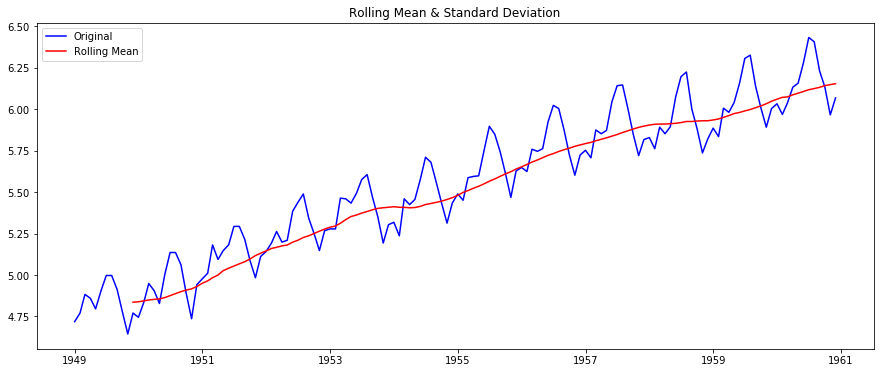

In [20]:
# Calculate the rolling mean of ts_log as moving_average
rol_avg  = ts_log.rolling(window=12).mean()
orig = plt.plot(ts_log, color='blue',label='Original')
mean = plt.plot(rol_avg, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)
# Plot ts_log and moving average in an overlapping manner to few the effect


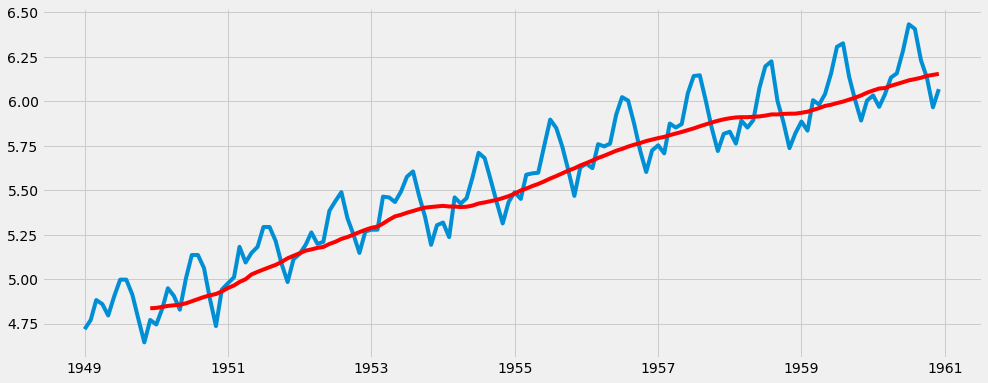

The red line shows the rolling mean. Lets subtract this from the original series. Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values. Let's subtract these values and check for Nans for undefined values. 

In [23]:
# Subtract the moving average from log transformed time-series and check head for Nans
ts_log_moving_avg_diff = ts_log - rol_avg
ts_log_moving_avg_diff.head(20)

# 	#Passengers
# Month	
# 1949-01-01	NaN
# 1949-02-01	NaN
# 1949-03-01	NaN
# 1949-04-01	NaN
# 1949-05-01	NaN
# 1949-06-01	NaN
# 1949-07-01	NaN
# 1949-08-01	NaN
# 1949-09-01	NaN
# 1949-10-01	NaN
# 1949-11-01	NaN
# 1949-12-01	-0.065494
# 1950-01-01	-0.093449
# 1950-02-01	-0.007566
# 1950-03-01	0.099416

#Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01    -0.065494
1950-01-01    -0.093449
1950-02-01    -0.007566
1950-03-01     0.099416
1950-04-01     0.052142
1950-05-01    -0.027529
1950-06-01     0.139881
1950-07-01     0.260184
1950-08-01     0.248635

Notice the first 11 being NaNs. Lets drop these values.

In [24]:
# Drop the NaN values from timeseries calculated above
ts_log_moving_avg_diff.dropna(inplace=True)

We can now use the `check_stationarity()` function we created earlier to measure to calculate rolling statistics and run adfuller test.

In [25]:
# Check stationarity of ts_log_moving_average
stationarity_check(ts_log_moving_avg_diff,12,'#Passengers')

Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64

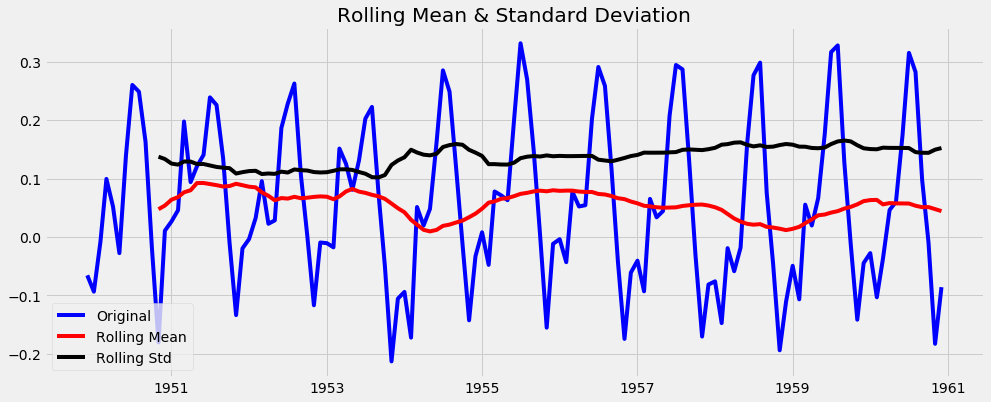

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


This looks much better . The rolling values appear to be varying slightly but there is no specific trend. Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.

## Weighted Moving Average (WMA)

A drawback with MA approach is that the time-period has to be strictly defined. In this case we can take yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. So we take a ‘Weighted Moving Average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is **Exponentially Weighted Moving Average** where weights are assigned to all the previous values with an exponential decay factor.This can be implemented in Pandas with `pandas.DataFrame.ewm()` method. Details of Pandas ewma can be found [HERE](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.ewm.html). Note that here the parameter ‘halflife’ is used to define the amount of exponential decay. This is just an assumption here and would depend largely on the business domain. Other parameters like span and center of mass can also be used to define decay which are discussed in the link shared above. Now, let’s remove this from series and check stationarity.

In [38]:
expwighted_avg

#Passengers
Month                  
1949-01-01     4.718499
1949-02-01     4.745345
1949-03-01     4.793835
1949-04-01     4.811785
1949-05-01     4.808206
1949-06-01     4.826807
1949-07-01     4.855564
1949-08-01     4.877049
1949-09-01     4.881978
1949-10-01     4.868821
1949-11-01     4.842036
1949-12-01     4.834027
1950-01-01     4.824557
1950-02-01     4.825744
1950-03-01     4.837657
1950-04-01     4.843949
1950-05-01     4.842546
1950-06-01     4.856559
1950-07-01     4.880081
1950-08-01     4.901033
1950-09-01     4.913937
1950-10-01     4.912097
1950-11-01     4.898667
1950-12-01     4.901883
1951-01-01     4.907382
1951-02-01     4.914838
1951-03-01     4.933808
1951-04-01     4.945007
1951-05-01     4.958991
1951-06-01     4.974181
...                 ...
1958-07-01     5.832405
1958-08-01     5.854442
1958-09-01     5.862700
1958-10-01     5.863859
1958-11-01     5.856708
1958-12-01     5.854650
1959-01-01     5.856417
1959-02-01     5.855203
1959-03-01     5.863694
1959-04-01     5.870306
1959-05-01     5.879851
1959-06-01     5.895416
1959-07-01     5.918491
1959-08-01     5.941385
1959-09-01     5.952411
1959-10-01     5.955579
1959-11-01     5.951988
1959-12-01     5.954903
1960-01-01     5.959293
1960-02-01     5.959821
1960-03-01     5.964204
1960-04-01     5.973704
1960-05-01     5.983994
1960-06-01     6.000740
1960-07-01     6.025006
1960-08-01     6.046445
1960-09-01     6.056778
1960-10-01     6.061079
1960-11-01     6.055750
1960-12-01     6.056461

[144 rows x 1 columns]

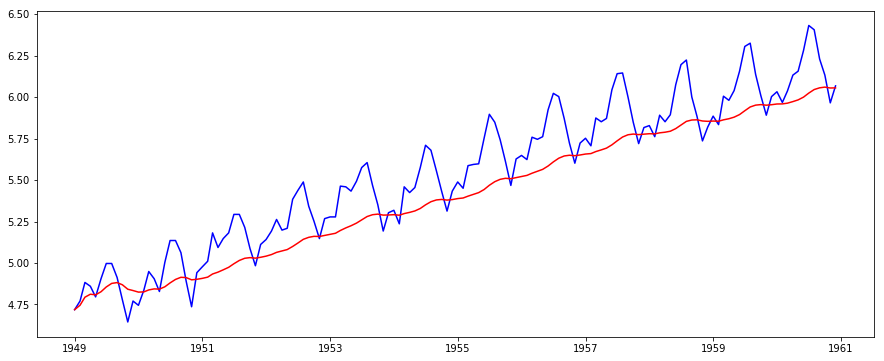

In [37]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log
expwighted_avg = ts_log.ewm(halflife=12).mean()

plt.plot(ts_log, color='blue',label='Original')
plt.plot(expwighted_avg, color='red', label='Rolling Mean')


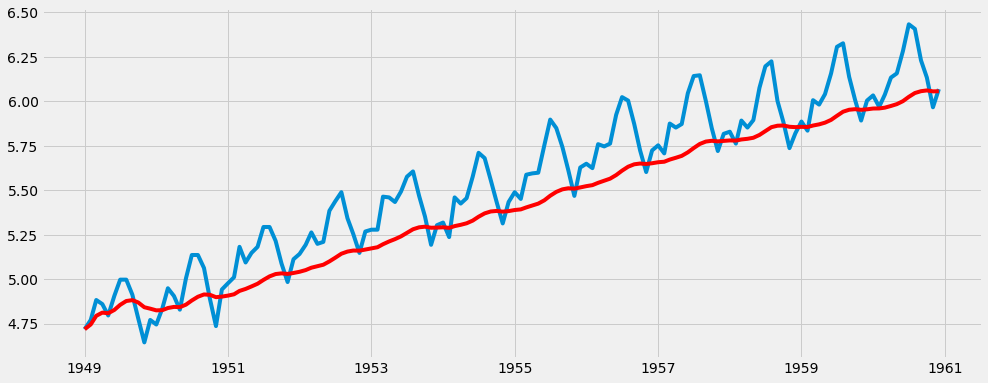

As above, we can subtract WMA time-series from the original and run the stationarity test. Note that in this case there will be no missing values as all values from starting are given weights. So it’ll work even with no previous values.

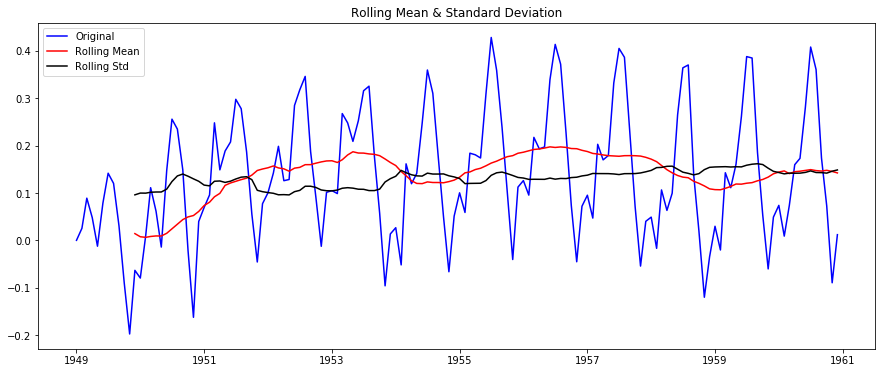

Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

In [40]:
# subtract the WMA from original TS and check stationarity
ts_log_ewma_diff = ts_log - expwighted_avg
stationarity_check(ts_log_ewma_diff,12,'#Passengers')

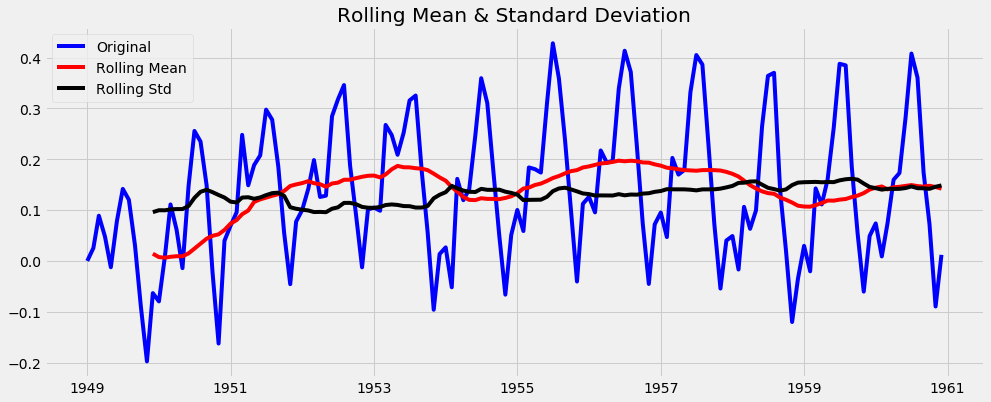

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


This TS has even lesser variations in mean and standard deviation in magnitude. Also, the test statistic is smaller than the 1% critical value, which is better than the previous case. 

## Summary 

In this lab, we learnt to measure the stationarity in a timeseries. We used Moving Average (MA) and Weighted Moving Average (WMA) to remove the trend in the time-series. In the next Lab, we shall see how to measure and remove seasonality in a time-series object. This would get our time-series ready for predictive modelling in following labs. 